#**Objective**
 **Predict a car’s miles per gallon (MPG) based on features like engine size, horsepower, and weight.**


#**Import Liabraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

#**Loading Dataset**
##**Notepad to CSV conversion**

In [ ]:
text_file = pd.read_csv(
    "/content/drive/MyDrive/datasets/auto+mpg/auto-mpg.data-original",
    delim_whitespace=True,
    on_bad_lines='warn'
)

feature_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
csv_file = text_file.to_csv("dataset.csv", index=False, header=feature_names)

<ipython-input-4-a1570d62097b>:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  text_file = pd.read_csv(


#**Data Preprocessing**

In [ ]:
df = pd.read_csv('/content/dataset.csv')
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
1,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
2,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
3,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
4,15.0,8.0,429.0,198.0,4341.0,10.0,70.0,1.0,ford galaxie 500


In [ ]:
df.dtypes

,0
mpg,float64
cylinders,float64
displacement,float64
horsepower,float64
weight,float64
acceleration,float64
model_year,float64
origin,float64


In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,397.000000,405.000000,405.000000,399.000000,405.000000,405.000000,405.000000,405.000000
mean,23.528463,5.469136,194.502469,105.020050,2978.118519,15.528395,75.935802,1.570370
std,7.820926,1.709658,104.903397,38.797303,847.649260,2.801345,3.741767,0.797962
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.500000,2226.000000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2815.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,129.500000,3620.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


##Handling Missing Data

In [ ]:
df.isnull().sum()

,0
mpg,8
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


<Axes: xlabel='horsepower'>

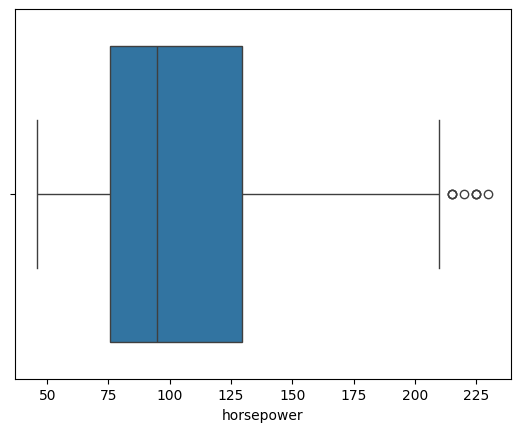

In [ ]:
sns.boxplot(x=df['horsepower'])

<Axes: xlabel='mpg'>

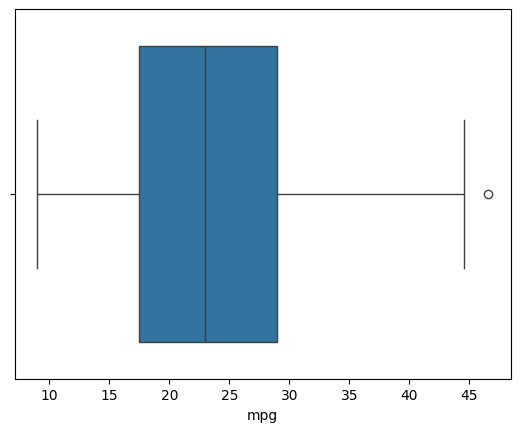

In [ ]:
sns.boxplot(x=df['mpg'])

In [ ]:
median=df['horsepower'].median()
df['horsepower']=df['horsepower'].fillna(median)

In [ ]:
median=df['mpg'].median()
df['mpg']=df['mpg'].fillna(median)

In [ ]:
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
car_name,0


#**Data Visualization**

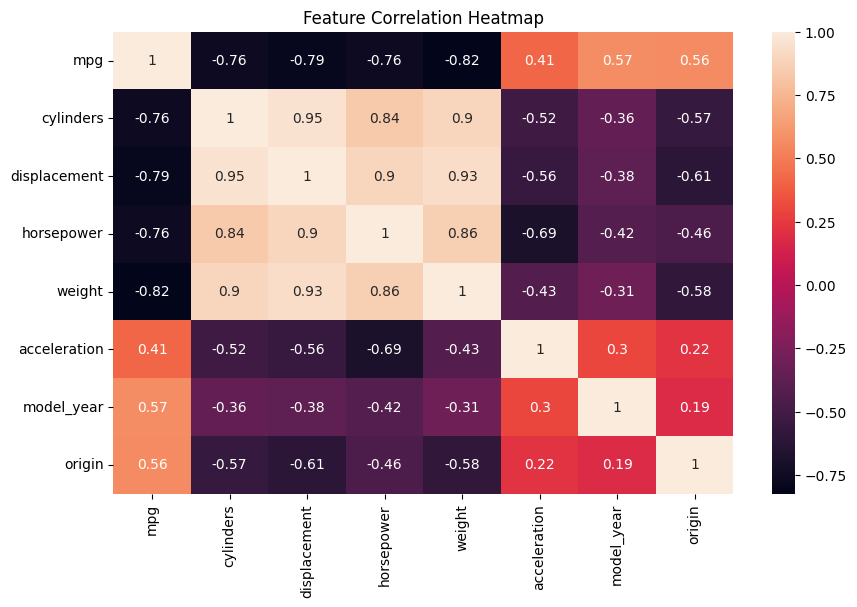

In [ ]:
df.drop(columns=['car_name'], inplace=True)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

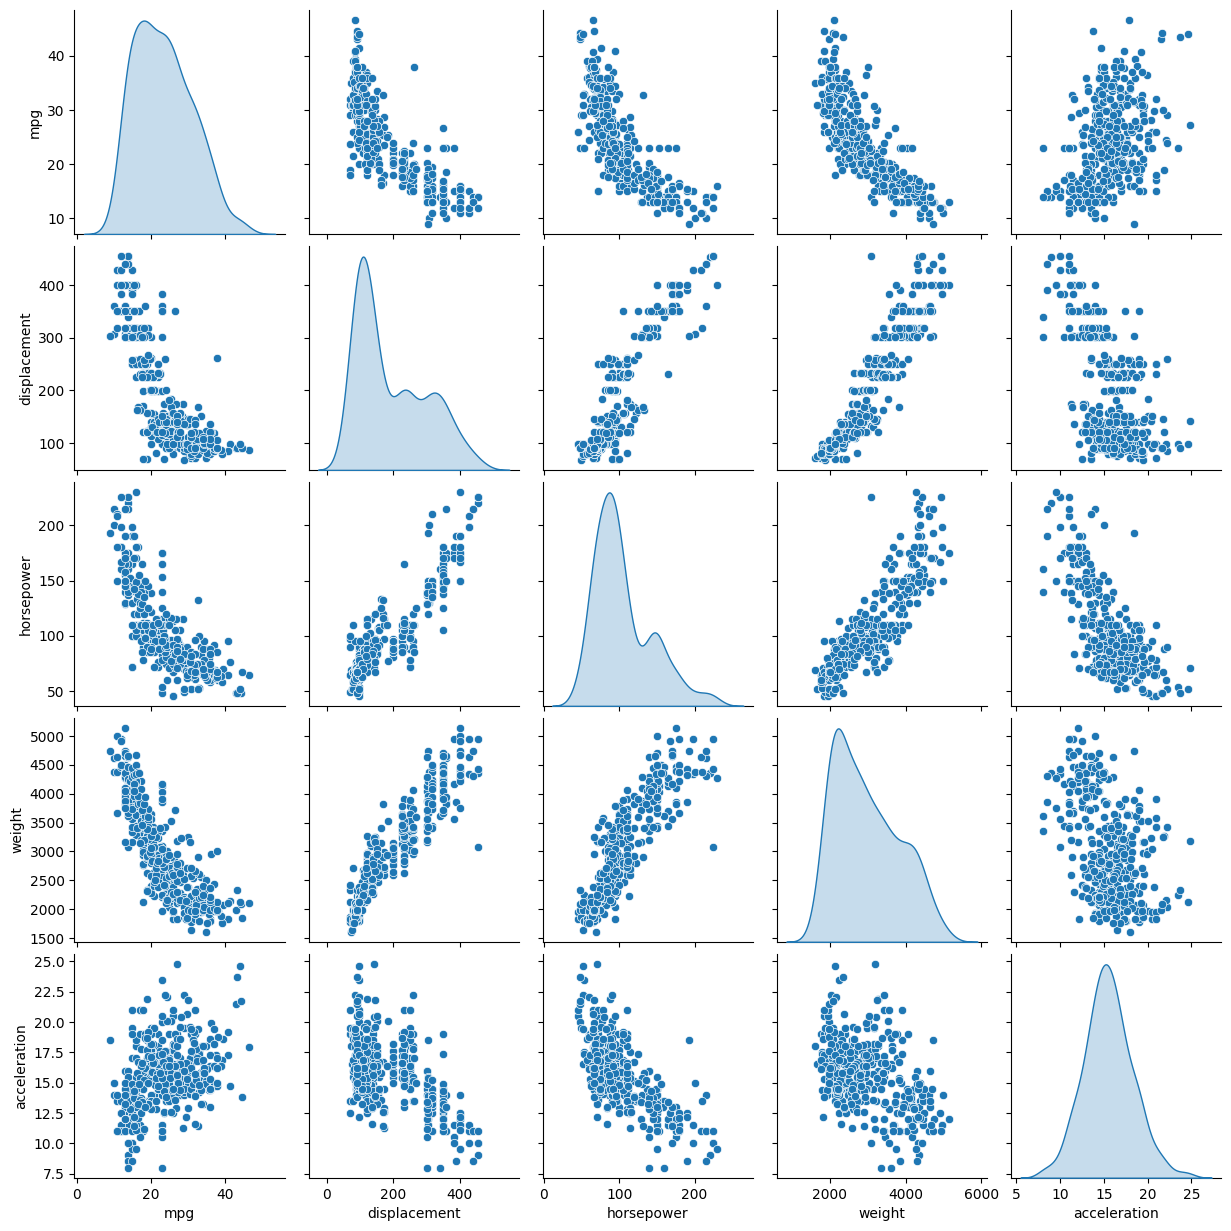

In [ ]:
sns.pairplot(df,vars=['mpg','displacement','horsepower','weight','acceleration'],  diag_kind="kde")
plt.show()

#**Data** **Splitting**

In [ ]:
X=df.drop(columns=['mpg'])
y=df['mpg']

#**Data** **Training**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic_net = ElasticNetCV(cv=5, random_state=100)
elastic_net.fit(X_train_scaled, y_train)
y_pred_en = elastic_net.predict(X_test_scaled)

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=10, gamma=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

#**Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}\n")

#**Results**

In [45]:
print("Results:")
evaluate_model(y_test, y_pred_en, "ElasticNet Regression")
evaluate_model(y_test, y_pred_svr, "Support Vector Machine")

Results:
ElasticNet Regression Evaluation:
Mean Squared Error: 7.83
R^2 Score: 0.83

Support Vector Machine Evaluation:
Mean Squared Error: 4.12
R^2 Score: 0.91

